In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv("student_exam_score.csv")
data.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,05-Oct,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,05-Oct,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [126]:
data.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [128]:
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [129]:
c = data.select_dtypes(["int64", "float64"]).corr()
c

,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.001195,-0.000874,-0.002554
MathScore,-0.001195,1.000000,0.817825,0.807118
ReadingScore,-0.000874,0.817825,1.000000,0.952584
WritingScore,-0.002554,0.807118,0.952584,1.000000


# change WklyStudyHours columns

In [130]:
data["WklyStudyHours"] = data["WklyStudyHours"].replace("> 10", 10)
data["WklyStudyHours"] = data["WklyStudyHours"].replace("< 5", 5)
data["WklyStudyHours"] = data["WklyStudyHours"].replace("05-Oct", "5-10")
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-10,82,90,93


# gender distribution

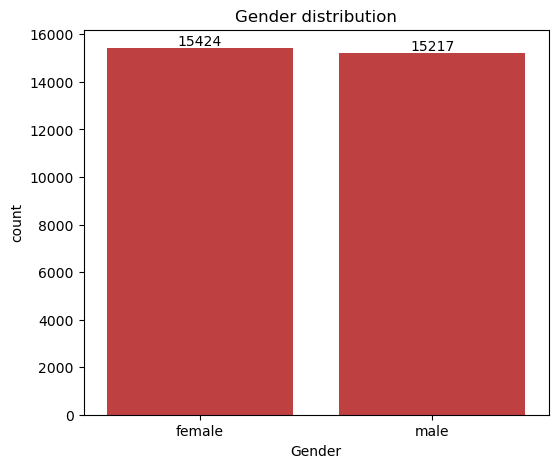

In [131]:
plt.figure(figsize=(6, 5))
a = sns.countplot(x = "Gender", data = data, color = "r", saturation=0.50)
a.bar_label(a.containers[0], fontsize = 10)
plt.title("Gender distribution")
plt.show()

# from the above data we analysed that the number of females in the data is more than the numbers of males

In [132]:
gb = data.groupby("ParentEduc").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


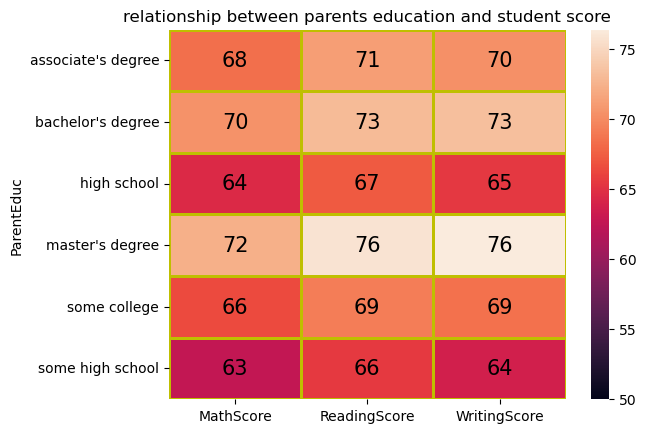

In [133]:
y = {"fontsize" : 15, "color" : "k"}
sns.heatmap(gb, vmin = 50, annot = True, annot_kws = y, linewidth = 1, linecolor = "y")
plt.title("relationship between parents education and student score")
plt.show()

#from the above chart we have concluded that the education of the parents have a good impact on their students.

In [134]:
gb1 = data.groupby("ParentMaritalStatus").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


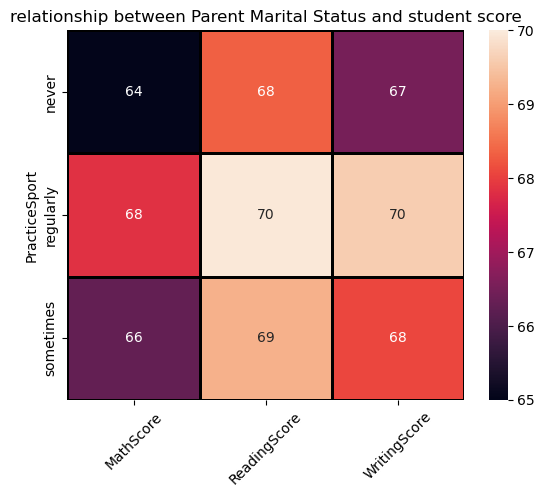

In [185]:
sns.heatmap(gb1, annot = True, vmin = 65, vmax = 70,  linewidth = 2, linecolor = "k")
plt.xticks(rotation = 45)
plt.title("relationship between Parent Marital Status and student score")
plt.show()

#from the above chart we have concluded that the Parent Marital Status have a negligible impact on their students marks.

In [136]:
gb1 = data.groupby("PracticeSport").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gb1

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


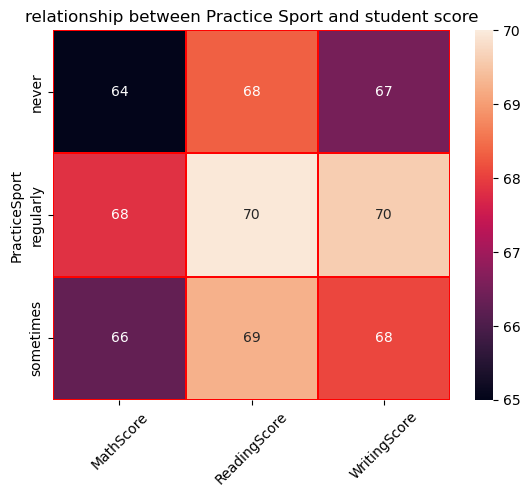

In [186]:
sns.heatmap(gb1, annot = True, vmin = 65, vmax = 70,  linewidth = 1.4, linecolor = "r")
plt.xticks(rotation = 45)
plt.title("relationship between Practice Sport and student score")
plt.show()

#from the above chart we have concluded that their is no major changes occur in the score of the student due to the Sport Practices.

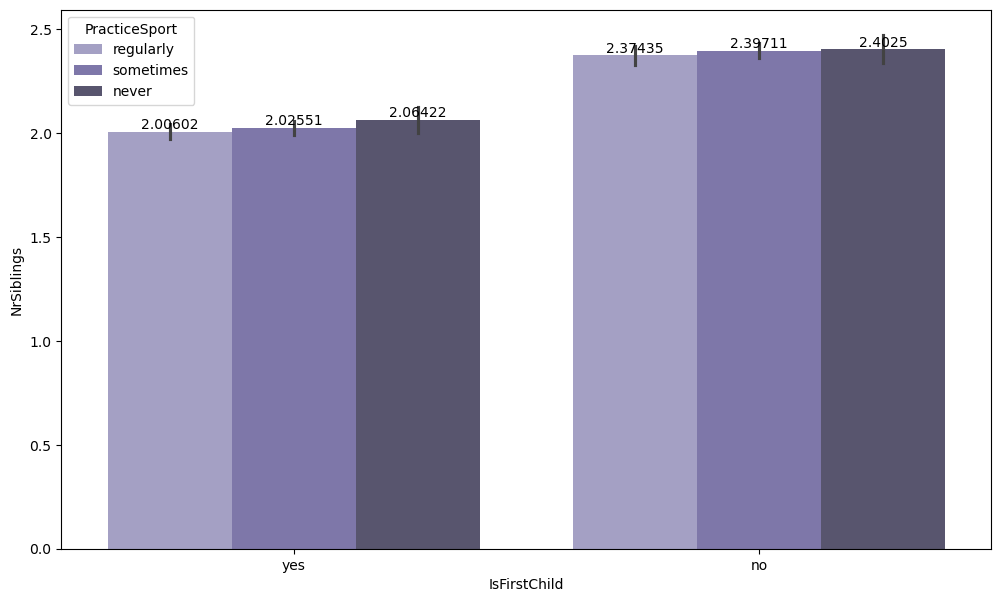

In [138]:
plt.figure(figsize = (12,7))
c = sns.barplot(x = "IsFirstChild", y = "NrSiblings", data = data, hue = 'PracticeSport', palette = 'Purples_d')
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
c.bar_label(c.containers[2])
plt.show()

#from the above data we concluded that if the a child have more percent of sibling and not a first child are more likely to play sports.

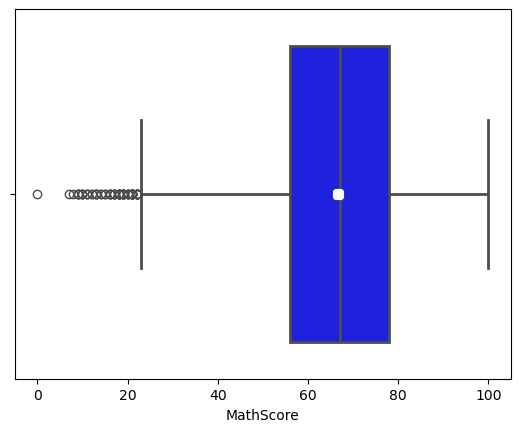

In [174]:
sns.boxplot(x = "MathScore", data = data, showmeans = True, meanprops = {"marker" : "+", "markeredgecolor" : "w", "markeredgewidth" : 8}, linewidth = 2, color = "b")
plt.show()


In [ ]:
#from the above data we concluded that there is lots of outliers in the above data even 1 student marks in the maths is 0.

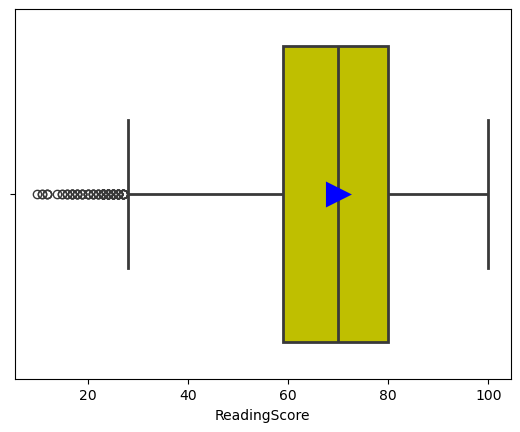

In [177]:
sns.boxplot(x = "ReadingScore", data = data, showmeans = True, meanprops = {"marker" : ">", "markeredgecolor" : "b", "markeredgewidth" : 8}, linewidth = 2, color = "y", saturation = 1)
plt.show()

#from the above data we concluded that there is lots of outliers in the above data but no student get score 0 as per math score.

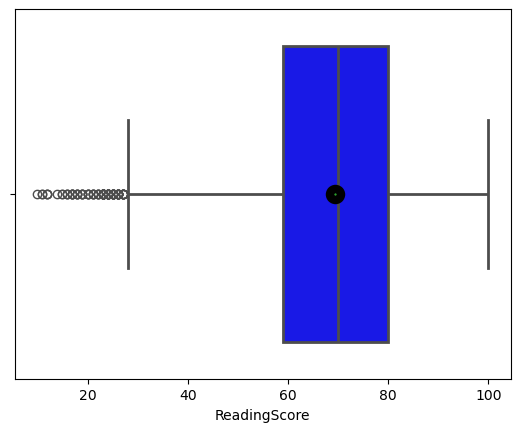

In [190]:
sns.boxplot(x = "ReadingScore", data = data, showmeans = True, meanprops = {"marker" : "o", "markeredgecolor" : "k", "markeredgewidth" : 8}, linewidth = 2, color = "b", saturation = 0.8)
plt.show()

#from the above data we concluded that there is lots of outliers in the above data but no student get score 0 as per math score.

In [189]:
data["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# Distribution of Ethnic group

In [193]:
h = data.groupby("EthnicGroup").agg({"EthnicGroup" : "count"})
h

,EthnicGroup
EthnicGroup,
group A,2219
group B,5826
group C,9212
group D,7503
group E,4041


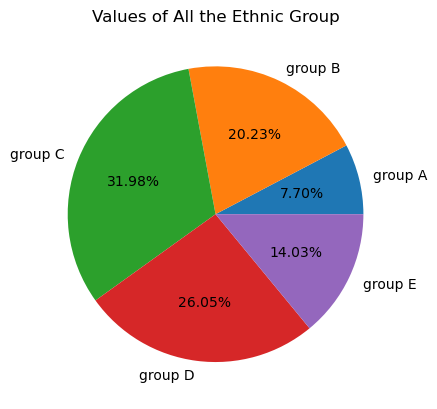

In [199]:
plt.pie(h['EthnicGroup'], labels = h.index, autopct="%1.2f%%")
plt.title("Values of All the Ethnic Group")
plt.show()

# The above Pie Chart show the Ethnic values of all the Groups.

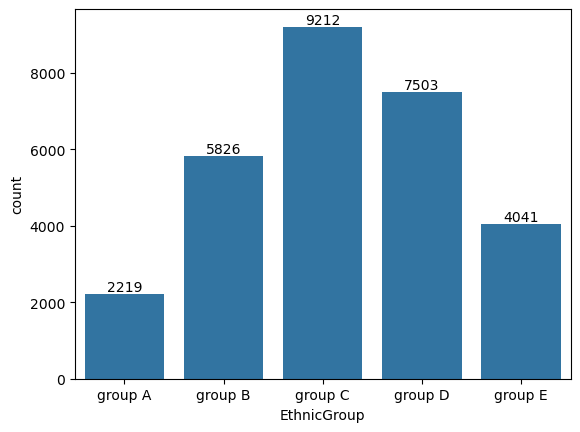

In [214]:
order = ["group A", "group B", "group C", "group D", "group E"]
c = sns.countplot(x = "EthnicGroup", data = data, order = order)
c.bar_label(c.containers[0])
plt.show()